# Imports Libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates

from datetime import date, datetime

import sys
sys.path.append("../src/")
from feature_engineering import produce_data_features, get_season, fillna_with_previous_values, fillna_with_mean, fillna_with_median, fillna_with_mean_of_last_values

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load data

In [2]:
df = pd.read_csv("/Users/ismail.lachheb/Projects/dsin2/la-haute-borne-data-2017-2020.csv", sep=";")
#df = pd.read_csv("/Users/lea.naccache/CODE/cercle_formation/la-haute-borne-data-2017-2020.csv", sep=";")

In [3]:
df.describe()

,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
count,215636.000000,215636.000000,215636.000000,215636.000000,215639.000000,215639.00000,215639.000000,215639.000000,215639.000000,215639.000000,...,0.0,0.0,33931.000000,0.0,0.0,0.0,33931.000000,0.0,0.0,0.0
mean,12.018144,10.838804,13.666945,0.936870,19.490556,19.30385,19.697785,0.100994,1088.096656,971.827998,...,NaN,NaN,173.004551,NaN,NaN,NaN,173.004551,NaN,NaN,NaN
std,25.365769,25.106044,26.108283,4.000833,6.685216,6.66859,6.691840,0.193629,605.395614,576.448215,...,NaN,NaN,86.065035,NaN,NaN,NaN,86.065035,NaN,NaN,NaN
min,-1.530000,-27.570000,-1.020000,0.000000,1.780000,1.00000,2.000000,0.000000,-574.890000,-574.950000,...,NaN,NaN,0.010000,NaN,NaN,NaN,0.010000,NaN,NaN,NaN
25%,-0.990000,-1.000000,-0.990000,0.000000,14.000000,14.00000,14.120000,0.000000,964.630000,954.940000,...,NaN,NaN,90.075001,NaN,NaN,NaN,90.075001,NaN,NaN,NaN
50%,-0.970000,-0.990000,-0.490000,0.000000,19.000000,19.00000,19.000000,0.000000,1200.870000,1046.810100,...,NaN,NaN,192.080000,NaN,NaN,NaN,192.080000,NaN,NaN,NaN
75%,2.970000,-0.960000,13.380000,0.190000,24.090000,24.00000,25.000000,0.180000,1593.030000,1390.565050,...,NaN,NaN,236.399990,NaN,NaN,NaN,236.399990,NaN,NaN,NaN
max,132.480000,92.750000,163.230000,46.070000,215.000000,215.00000,215.000000,39.790000,1807.600000,1802.250000,...,NaN,NaN,360.000000,NaN,NaN,NaN,360.000000,NaN,NaN,NaN


In [4]:
df.shape

(217588, 138)

# Analysis 

In [5]:
df.keys()

Index(['Wind_turbine_name', 'Date_time', 'Ba_avg', 'Ba_min', 'Ba_max',
       'Ba_std', 'Rt_avg', 'Rt_min', 'Rt_max', 'Rt_std',
       ...
       'Pas_max', 'Pas_std', 'Wa_c_avg', 'Wa_c_min', 'Wa_c_max', 'Wa_c_std',
       'Na_c_avg', 'Na_c_min', 'Na_c_max', 'Na_c_std'],
      dtype='object', length=138)

In [6]:
df.Wind_turbine_name.value_counts()

R80736    54433
R80721    54433
R80711    54433
R80790    54289
Name: Wind_turbine_name, dtype: int64

(80, 120)

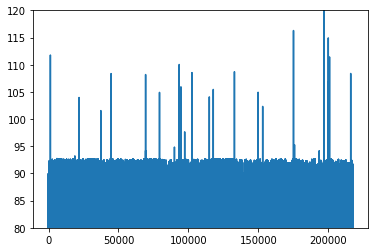

In [7]:
plt.plot(df.Ba_avg)
plt.ylim((80, 120))   # set the xlim to left, right

# Feature Engineering

### Select target

In [8]:
target = "Ba_avg"

In [9]:
df = df.dropna(subset=[target], axis=0)

### Create feature with time

In [10]:
df = produce_data_features(df)

### remove columns with missing values 

In [11]:
df

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,date,year,month,season
0,R80721,2017-02-08T08:00:00+01:00,44.990002,44.990002,44.990002,0.00,14.00,14.00,14.0,0.00,...,NaN,NaN,358.04999,NaN,NaN,NaN,2017-02-08 07:00:00+00:00,2017,2,1
1,R80721,2017-01-26T02:40:00+01:00,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-26 01:40:00+00:00,2017,1,1
2,R80721,2017-01-26T13:50:00+01:00,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-26 12:50:00+00:00,2017,1,1
3,R80721,2017-01-26T15:00:00+01:00,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-26 14:00:00+00:00,2017,1,1
4,R80721,2017-02-18T01:10:00+01:00,44.990002,44.990002,44.990002,0.00,17.00,17.00,17.0,0.00,...,NaN,NaN,7.99000,NaN,NaN,NaN,2017-02-18 00:10:00+00:00,2017,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217583,R80721,2017-12-13T23:10:00+01:00,1.690000,-1.020000,13.300000,3.62,15.11,15.00,16.0,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-13 22:10:00+00:00,2017,12,1
217584,R80721,2017-12-14T03:30:00+01:00,6.350000,-1.010000,18.230000,5.51,16.15,16.00,17.0,0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-14 02:30:00+00:00,2017,12,1
217585,R80721,2017-12-14T04:20:00+01:00,-0.570000,-1.030000,4.320000,0.88,17.00,17.00,17.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-14 03:20:00+00:00,2017,12,1
217586,R80721,2017-12-14T05:10:00+01:00,-0.830000,-1.020000,3.890000,0.45,17.00,16.76,17.0,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-14 04:10:00+00:00,2017,12,1


In [12]:
df.isnull().sum()[df.isnull().sum() > 100000].count()

16

In [13]:
df.isnull().sum()[df.isnull().sum() > 0].count()

60

In [14]:
df.isnull().sum()[df.isnull().sum() > 0]

Q_avg         3330
Q_min         3330
Q_max         3330
Q_std         3330
S_avg            3
S_min            3
S_max            3
S_std            3
Ds_avg        1271
Ds_min        1271
Ds_max        1271
Ds_std        1271
Ws1_avg        988
Ws1_min        988
Ws1_max        988
Ws1_std        988
Ws2_avg        952
Ws2_min        952
Ws2_max        952
Ws2_std        952
Va1_avg      77132
Va1_min      77132
Va1_max      77132
Va1_std      77132
Va2_avg      77132
Va2_min      77132
Va2_max      77132
Va2_std      77132
Va_avg      138504
Va_min      138504
Va_max      138504
Va_std      138504
Nf_avg           3
Nf_min           3
Nf_max           3
Nf_std           3
Nu_avg           3
Nu_min           3
Nu_max           3
Nu_std           3
Rs_avg        2832
Rs_min        2832
Rs_max        2832
Rs_std        2832
Rm_avg        3551
Rm_min        3551
Rm_max        3551
Rm_std        3551
Pas_avg     215636
Pas_min     215636
Pas_max     215636
Pas_std     215636
Wa_c_avg    

we need to replace value for 15 distribution

In [15]:
df[df[['Q_avg','Q_min','Q_max', 'Q_std']].isna().any(axis=1)][['Q_avg', 'Q_min', 'Q_max', 'Q_std']]

,Q_avg,Q_min,Q_max,Q_std
866,NaN,NaN,NaN,NaN
1125,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN
1305,NaN,NaN,NaN,NaN
1314,NaN,NaN,NaN,NaN
...,...,...,...,...
217408,NaN,NaN,NaN,NaN
217410,NaN,NaN,NaN,NaN
217412,NaN,NaN,NaN,NaN
217414,NaN,NaN,NaN,NaN


## 1. fill with the previous value

In [17]:
 df = df.sort_values(by='date')

In [19]:
features = ['Q_avg','Q_min','Q_max','Q_std']

In [20]:
fillna_with_previous_values(features, df)

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,date,year,month,season
125374,R80790,2017-01-01T00:00:00+01:00,-1.000000,-1.000000,-0.860000,0.01,13.00,13.0,13.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
164341,R80721,2017-01-01T00:00:00+01:00,91.529999,91.529999,91.529999,0.00,12.21,12.0,13.0,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
60539,R80711,2017-01-01T00:00:00+01:00,-0.990000,-0.990000,-0.900000,0.00,12.00,12.0,12.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
115585,R80736,2017-01-01T00:00:00+01:00,0.000000,0.000000,0.000000,0.00,11.00,11.0,11.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
17563,R80711,2017-01-01T00:10:00+01:00,-0.990000,-0.990000,-0.990000,0.00,12.00,12.0,12.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:10:00+00:00,2016,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74443,R80736,2018-01-12T23:50:00+01:00,45.000000,45.000000,45.000000,0.00,13.79,13.0,14.0,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 22:50:00+00:00,2018,1,1
79411,R80721,2018-01-13T00:00:00+01:00,44.990000,44.990000,44.990000,0.00,14.94,14.0,15.0,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1
175989,R80711,2018-01-13T00:00:00+01:00,-0.060000,-0.490000,0.500000,0.36,13.41,13.0,14.0,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1
208260,R80790,2018-01-13T00:00:00+01:00,44.990000,44.990000,44.990000,0.00,14.00,13.5,14.0,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1


## 2. Replace by the average value 

In [21]:
features = ['Va1_avg','Va1_min','Va1_max','Va1_std']

In [22]:
fillna_with_mean(features, df)

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,date,year,month,season
125374,R80790,2017-01-01T00:00:00+01:00,-1.000000,-1.000000,-0.860000,0.01,13.00,13.0,13.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
164341,R80721,2017-01-01T00:00:00+01:00,91.529999,91.529999,91.529999,0.00,12.21,12.0,13.0,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
60539,R80711,2017-01-01T00:00:00+01:00,-0.990000,-0.990000,-0.900000,0.00,12.00,12.0,12.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
115585,R80736,2017-01-01T00:00:00+01:00,0.000000,0.000000,0.000000,0.00,11.00,11.0,11.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
17563,R80711,2017-01-01T00:10:00+01:00,-0.990000,-0.990000,-0.990000,0.00,12.00,12.0,12.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:10:00+00:00,2016,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74443,R80736,2018-01-12T23:50:00+01:00,45.000000,45.000000,45.000000,0.00,13.79,13.0,14.0,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 22:50:00+00:00,2018,1,1
79411,R80721,2018-01-13T00:00:00+01:00,44.990000,44.990000,44.990000,0.00,14.94,14.0,15.0,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1
175989,R80711,2018-01-13T00:00:00+01:00,-0.060000,-0.490000,0.500000,0.36,13.41,13.0,14.0,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1
208260,R80790,2018-01-13T00:00:00+01:00,44.990000,44.990000,44.990000,0.00,14.00,13.5,14.0,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1


In [23]:
df[['Va1_avg','Va1_min','Va1_max','Va1_std']].isnull().sum()

Va1_avg    0
Va1_min    0
Va1_max    0
Va1_std    0
dtype: int64

## 3. Replace by the median value 

In [24]:
features = ['Va2_avg','Va2_min','Va2_max','Va2_std']

In [25]:
df['Va1_avg'].median()

0.636718073124252

In [26]:
fillna_with_median(features)

TypeError: fillna_with_median() missing 1 required positional argument: 'df'

In [27]:
df[['Va2_avg','Va2_min','Va2_max','Va2_std']].isnull().sum()

Va2_avg    77132
Va2_min    77132
Va2_max    77132
Va2_std    77132
dtype: int64

## 4. Replace by the mean of the last 30 values 

In [28]:
features = ['Rs_avg', 'Rs_min', 'Rs_max', 'Rs_std', 'Rm_avg', 'Rm_min', 'Rm_max', 'Rm_std'] 

In [29]:
fillna_with_mean_of_last_values(features, df, 30, 1)

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std,date,year,month,season
125374,R80790,2017-01-01T00:00:00+01:00,-1.000000,-1.000000,-0.860000,0.01,13.00,13.0,13.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
164341,R80721,2017-01-01T00:00:00+01:00,91.529999,91.529999,91.529999,0.00,12.21,12.0,13.0,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
60539,R80711,2017-01-01T00:00:00+01:00,-0.990000,-0.990000,-0.900000,0.00,12.00,12.0,12.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
115585,R80736,2017-01-01T00:00:00+01:00,0.000000,0.000000,0.000000,0.00,11.00,11.0,11.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:00:00+00:00,2016,12,1
17563,R80711,2017-01-01T00:10:00+01:00,-0.990000,-0.990000,-0.990000,0.00,12.00,12.0,12.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31 23:10:00+00:00,2016,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74443,R80736,2018-01-12T23:50:00+01:00,45.000000,45.000000,45.000000,0.00,13.79,13.0,14.0,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 22:50:00+00:00,2018,1,1
79411,R80721,2018-01-13T00:00:00+01:00,44.990000,44.990000,44.990000,0.00,14.94,14.0,15.0,0.21,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1
175989,R80711,2018-01-13T00:00:00+01:00,-0.060000,-0.490000,0.500000,0.36,13.41,13.0,14.0,0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1
208260,R80790,2018-01-13T00:00:00+01:00,44.990000,44.990000,44.990000,0.00,14.00,13.5,14.0,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 23:00:00+00:00,2018,1,1


## 5. Replace by an hard value

In [30]:
X = df.drop(columns=["Wind_turbine_name", target, "Ba_min", "Ba_max", "Ba_std", "Date_time", "date"])
y = df[target]

In [31]:
X = X.fillna(0)

In [32]:
y = df[target]

### Split Dataset into train and test

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Random forest model

## Training 

In [34]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=6)

In [35]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=6, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Prediction 

In [36]:
y_pred_test = model.predict(X_test)
((y_pred_test - y_test) > 0.2).value_counts() / len(y_test)

False    0.915599
True     0.084401
Name: Ba_avg, dtype: float64

In [37]:
y_pred_train = model.predict(X_train)
((y_pred_train - y_train) > 0.2).value_counts() / len(y_train)

False    0.916664
True     0.083336
Name: Ba_avg, dtype: float64